# 1. Mapas Coropléticos 

## 1.1 Introducción: 

El objetivo del presente documento es analizar una serie de metodologías médiate la utilización de Python y la biblioteca Pandas con su extensión GeoPandas  para el  análisis de datos espaciales,  herramientas comúnmente utilizadas en “Ciencia de Datos”, para  la confección de mapas coropléticos a partir de la utilización de datos de casos de covid19 en los partidos de la cuenca del río Luján.

En el análisis de la distribución espacial de los fenómenos sobre la superficie terrestre los mapas coropléticos  desempeñan un papel destacado en la ciencia de datos espaciales*. En la actualidad con la pandemia del COVID19 estos han  adquirido un gran  protagonismo en los medios de comunicación, tal y como se vio con la publicación del mapa de la distribución espacial de casos de COVID-19 a escala mundial realizada por la universidad Johns Hopkins (https://coronavirus.jhu.edu/map.html).


  La palabra coropleta  proviene de la raíz “coro” que significa área o región. Un mapa coropético presenta datos en cada región que se encuentra asociada  a la intensidad en una rampa de colores, cada observación se encuentra vinculada un valor en una tabla de atributo (el valor de la variable a representar)  y una geometría por lo general un polígono, las unidades espaciales. 

Mostrar valores cuantitativos en mapas coropléticos  envuelve la tarea  de representar los datos  de manera correcta y al mismo tiempo poder ordenar los mismos de forma  que podamos detectar patrones en ellos. Las clase van a agrupar las entidades con valores similares, estas se van a representar con un color. Los límites de clases, van a definir como las entidades quedaran agrupadas, según como establezcamos estos límites, vamos a obtener mapas distintos. La efectividad de un mapa coroplético dependerá de los esquemas de clasificación junto a las estrategias de  color y simbología a adoptar. En términos generales los esquemas de clasificación define el número de clases, así como las reglas de asignación, mientras la forma de simbolizar debería transmitir información sobre la diferenciación de valor entre las clases. 

Existen dos criticas básicas que se le puede atribuir a este tipo de representación según Buzai y Baxandale, (2012). El primero de ellos radica  en el tamaño relativo o absoluto de las unidades espaciales, ya que cada valor se representa de forma homogénea en su interior cuanto mayor superficie ocupa más alejado estará de la realidad. El segundo aspecto a resolver es la cantidad de intervalos de clase (K) a utilizar pues aquí se producen ciertos inconvenientes entre el máximo de categorías y el nivel de lectura, debido a que la  mayor cantidad de categorías  brindaría  la mejor variación en la distribución espacial, sin embargo esto afectaría la comprensión del mapa. 

 ## 1.2 Software y datasets

Python es un lenguaje de programación de alto nivel  utilizado en ciencia de datos. Python es un lenguaje que se caracteriza por su facilidad al implementarlo y de alta performance. Este lenguaje es ampliamente utilizado en todos los ámbitos de la ciencia,  la NASA en el control de satélites hasta en muchos ámbitos de la industria en el control de procesos. Existen comunidades científicas en todo el mundo para respaldar y mejorar  este lenguaje a través de la biblioteca Scintific Python scipy y la organización PyData. Dentro del dominio geográfico es el lenguaje utilizado para la creación de scripts en sistemas de información geográfica como QGIS Y ArcGIS. 

 Python se compila sobre la marcha sin necesidad de compilarlo. Lo que lo diferencia de otro tipo de lenguaje, que requieren un paso adicional no interpretativo en el que el programa se convierte en un archivo binario, que luego se ejecuta. En su lugar podemos escribir simplemente el código, ejecutarlo, solucionar cualquier problema y volver a ejecutarlo. Esto convierte a Python en una herramienta realmente muy buena y productiva para la ciencia, ya que podemos crear código prototipo, modificarlo, mejorarlo y hasta reutilizar.

El poder de Python como herramienta de análisis de datos proviene realmente de paquetes adicionales, código adicional  llamadas bibliotecas que agrega funcionalidad al lenguaje en sí. Python posee un amplio ecosistema de bibliotecas para ciencia de datos y en especial para el análisis espacial, siendo la principal Geopandas. La carga de paquetes Python se denomina importación. GeoPandas amplia a la biblioteca Pandas de ciencia de datos al agregar soporte para datos geoespaciales. 

La estructura de datos central en GeoPandas es geopandas.GeoDataFrame una subclase pandas.DataFrame  capas almacenar columnas geométricas y realizar operaciones espaciales. Un archivo que contiene datos como geometrías con extensión GeoPackage, GeoJSON o Shapefile   puede ser leído por esta biblioteca.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import pysal as ps
import seaborn as sns
from sqlalchemy import create_engine
import pandas as pd
import numpy as np


## 1.4 Clasificación de los datos 

En la elección de los esquemas de clasificación se debe tener en cuenta la distribución estadística de los  datos. Para ver esta cuestión se analizaran los datos  de  muertes  por COVID-19 en los 16 partidos que integran la Cuenca del río Luján. La variable que utilizaremos será la tasa de mortalidad (Tasa_Mortalidad).

In [3]:
df = "partidos_cuenca.geojson"
gdf = gpd.read_file(df);
gdf[['Tasa_Mortalidad']].head()


,Tasa_Mortalidad
0,232
1,208
2,201
3,171
4,218


* Distribucion estadistica de los datos:

C:\Users\Cafetera\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


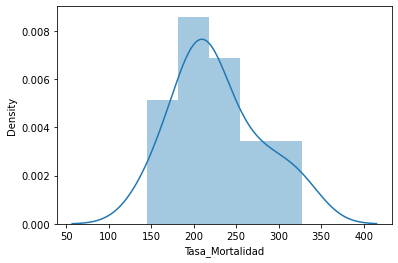

In [55]:
h = sns.distplot(gdf ['Tasa_Mortalidad'], bins= 5 );

Como se puede observar, la distribución esta algo sesgado hacia la derecha, es decir esta sesgada positivamente. En otras palabras, la media supera a la mediana( 50%, como se puede ver en la siguiente tabla).

In [5]:
gdf['Tasa_Mortalidad'].describe()

count     16.000000
mean     227.500000
std       51.136419
min      145.000000
25%      203.250000
50%      213.000000
75%      257.750000
max      327.000000
Name: Tasa_Mortalidad, dtype: float64

El método seaborn.distplot usa la función del histograma de matplotlib para determinar los limites de clase y el conteo de las observaciones en cada clase. En nuestro histograma tenemos cinco clases.

In [6]:
 counts, bins, patches = h.hist(gdf['Tasa_Mortalidad'], bins=5)

El objeto conteo entrega cuantas observaciones tiene cada categoría en la clasificación: 

In [7]:
print(counts)

[3. 5. 4. 2. 2.]


El objeto bin almacena estos puntos de ruptura que nos interesa cuando consideramos esquemas de clasificación.

In [8]:
print (bins)

[145.  181.4 217.8 254.2 290.6 327. ]


Podemos observar cinco conteos, el conteo que tiene el mayor  número de observaciones comprende como límite inferior de 181,4 y un límite superior 217,8 con 5 observaciones. Para la determinación del ancho del intervalo y el número de conteos seaborn se basa en la regla de Freedman Diaconis.

 ## 1.5	Métodos para la determinación de intervalos de clase 

### 1.5.1   Mapa de cortes naturales 

Es una representación que se basa en la estructura que forman  los datos en la búsqueda de regularidades interna. Se debe encontrar los saltos naturales que pueden ser tomados como limites de los intervalos. 


Cuando el procedimiento se realiza de forma visual la cantidad de intervalos puede resultar evidente, pero si el objetivo es realizar una serie cartográfica para diferentes variables en una misma área de estudio esta metodología puede dar como resultado mapas con diferentes cantidades de intervalos. La desventaja es que no permite hacer comparaciones, espaciales y/o temporales, dado que la clasificación se basa en el comportamiento intrínseco de los datos.

[Text(0.5, 0, 'Unidades espaciales'), Text(0, 0.5, 'Tasa de Mortalidad')]

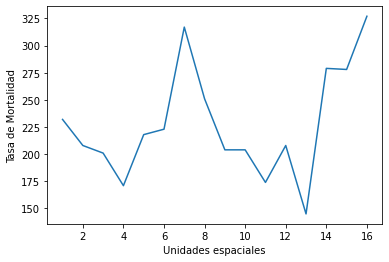

In [67]:
 CortesNaturales= sns.lineplot( data = gdf, y= 'Tasa_Mortalidad',x= 'id');
    
CortesNaturales.set(
       xlabel='Unidades espaciales',
       ylabel='Tasa de Mortalidad'
       ) 



In [19]:
NaturalBreaks= mapclassify.NaturalBreaks(gdf.Tasa_Mortalidad,k=5)
NaturalBreaks


NaturalBreaks           

    Interval       Count
------------------------
[145.00, 174.00] |     3
(174.00, 223.00] |     7
(223.00, 251.00] |     2
(251.00, 279.00] |     2
(279.00, 327.00] |     2

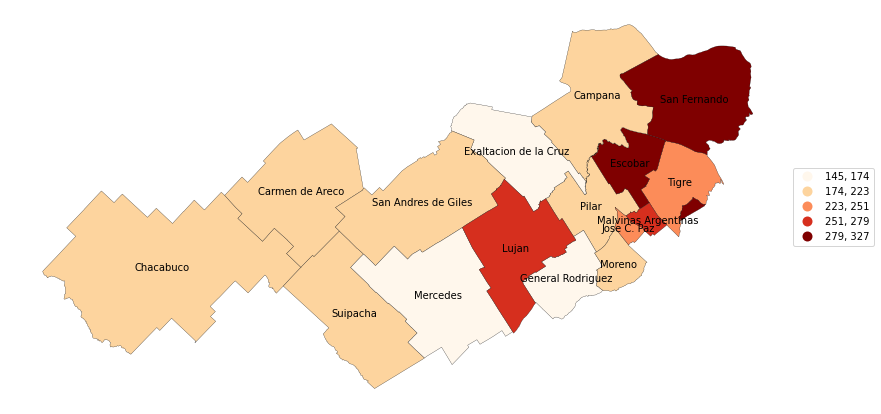

In [9]:
gdf.plot(
    column='Tasa_Mortalidad', 
    scheme='NaturalBreaks', 
    k = 5, 
    cmap='OrRd', 
    edgecolor='k', 
    figsize=(14,10),
    linewidth=0.25,
    legend=True,  
    legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':'{:.0f}'})
# bucle for 
for index,row in gdf.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['Nombre'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')

plt.show()
